Importing Libraries

In [ ]:
# Importing the require libraries

# For structuring data into dataframes
import pandas as pd
# For creating numpy arrays
import numpy as np
# For plotting data
import matplotlib.pyplot as plt
# For data visualization & analysis
import seaborn as sns
# For transforming categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
# For splitting training data & testing data
from sklearn.model_selection import train_test_split
# For mathematical calculations
import math

# Regression model for prediction
from sklearn.ensemble import RandomForestRegressor

# For the evaluation of the model's performance
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Data Collection and Preprocessing

In [ ]:
# loading the csv data into a pandas dataframe
diamonds_data = pd.read_csv('/content/diamonds.csv')

In [ ]:
# previewing the dataframe
diamonds_data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [ ]:
# dropping the unwanted 'Unnamed' index column
diamonds_data = diamonds_data.drop(diamonds_data.columns[0], axis=1)

In [ ]:
# previewing the data after dropping the index column
diamonds_data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [ ]:
# previewing the shape of the dataframe
diamonds_data.shape

(53940, 10)

In [ ]:
# checking null value
diamonds_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# checking the information of data
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
# previewing the total number of unique categorical data
print(f"Cuts: {len(diamonds_data['cut'].unique())}")
print(f"Colors: {len(diamonds_data['color'].unique())}")
print(f"Clarities: {len(diamonds_data['clarity'].unique())}")

Cuts: 5
Colors: 7
Clarities: 8


In [ ]:
# applying label encoder method to transform the categorical data into numerical data
encoder = LabelEncoder()

diamonds_data['cut'] = encoder.fit_transform(diamonds_data['cut'])
cut_mappings = {index: label for index, label in enumerate(encoder.classes_)}

diamonds_data['color'] = encoder.fit_transform(diamonds_data['color'])
color_mappings = {index: label for index, label in enumerate(encoder.classes_)}

diamonds_data['clarity'] = encoder.fit_transform(diamonds_data['clarity'])
clarity_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [ ]:
# previewing the mappings of labels
print(cut_mappings)
print(color_mappings)
print(clarity_mappings)

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


In [ ]:
# previewing the dataframe after transformation
diamonds_data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# checking the data type after transformation
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Data Cleaning

In [ ]:
# checking the description of diamonds dataframe
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# found 0 values in x, y, z
# x, y, z can't be 0 as they are measurements of the diamond
# 0 in x,y,z may lead the diamonds into 2D shape which cause diamonds into dimentionless

# dropping dimentionless diamonds
diamonds_data = diamonds_data.drop(diamonds_data[diamonds_data['x']==0].index)
diamonds_data = diamonds_data.drop(diamonds_data[diamonds_data['y']==0].index)
diamonds_data = diamonds_data.drop(diamonds_data[diamonds_data['z']==0].index)
diamonds_data.shape

(53920, 10)

In [ ]:
# a total of 20 data points are dropped
# rechecking the dataframe after dropping unwanted data
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.553079,2.594028,3.835441,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.027705,1.701272,1.724549,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0, 0.5, 'z')

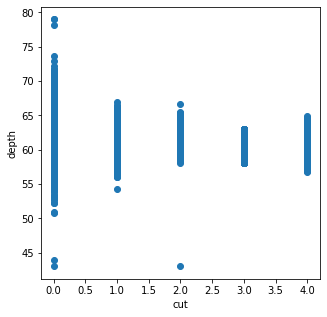

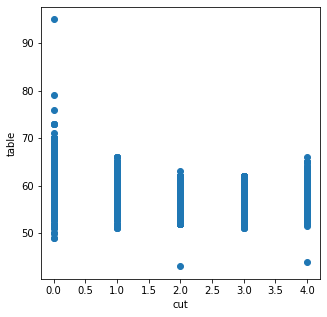

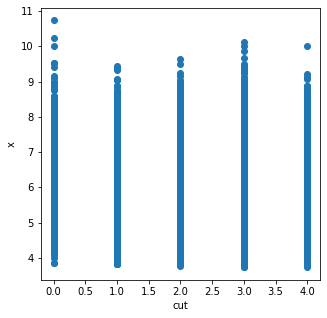

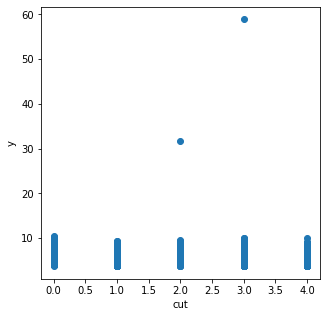

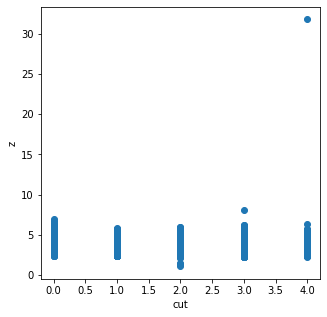

In [ ]:
# checking the outliers within the dataset
fig, ax = plt.subplots (figsize = (5,5))
ax.scatter (diamonds_data['cut'],diamonds_data['depth'])
ax.set_xlabel('cut')
ax.set_ylabel('depth')

fig, ax = plt.subplots (figsize = (5,5))
ax.scatter (diamonds_data['cut'], diamonds_data['table'])
ax.set_xlabel('cut')
ax.set_ylabel('table')

fig, ax = plt.subplots (figsize = (5,5))
ax.scatter (diamonds_data['cut'], diamonds_data['x'])
ax.set_xlabel('cut')
ax.set_ylabel('x')

fig, ax = plt.subplots (figsize = (5,5))
ax.scatter (diamonds_data['cut'], diamonds_data['y'])
ax.set_xlabel('cut')
ax.set_ylabel('y')

fig, ax = plt.subplots (figsize = (5,5))
ax.scatter (diamonds_data['cut'], diamonds_data['z'])
ax.set_xlabel('cut')
ax.set_ylabel('z')

In [ ]:
# limiting the data to remove the outliers
diamonds_data = diamonds_data[(diamonds_data["depth"]<75)&(diamonds_data["depth"]>45)]
diamonds_data = diamonds_data[(diamonds_data['table']<75)&(diamonds_data['table']>45)]
diamonds_data = diamonds_data[(diamonds_data['x']<30)]
diamonds_data = diamonds_data[(diamonds_data['y']<30)]
diamonds_data = diamonds_data[(diamonds_data['z']<30)&(diamonds_data['z']>2)]

In [ ]:
# reviewing the shape after removing unwanted data
diamonds_data.shape

(53903, 10)

Data Visualization & Analysis

In [ ]:
# to check the relationship between the data
correlation = diamonds_data.corr()

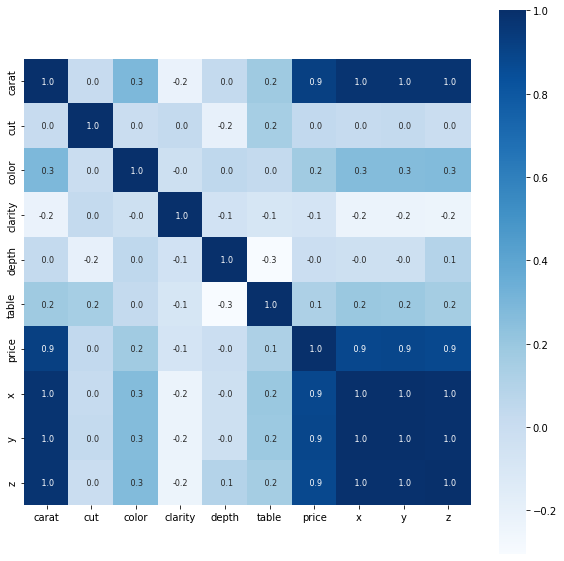

In [ ]:
# creating heat map to view data correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt=' .1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [ ]:
# checking the correlation of other variables with price
print(correlation['price'])

carat      0.921592
cut        0.039974
color      0.172341
clarity   -0.071524
depth     -0.010227
table      0.127465
price      1.000000
x          0.887212
y          0.888807
z          0.882636
Name: price, dtype: float64


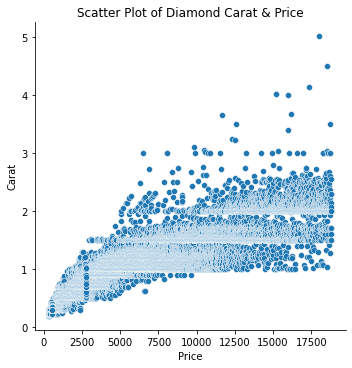

In [ ]:
# the weight of the diamond has the highest correlation with price
# creating scatter plot between carat and price
sns.relplot(data = diamonds_data, x=diamonds_data['price'], y=diamonds_data['carat'])
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title("Scatter Plot of Diamond Carat & Price")
plt.show()

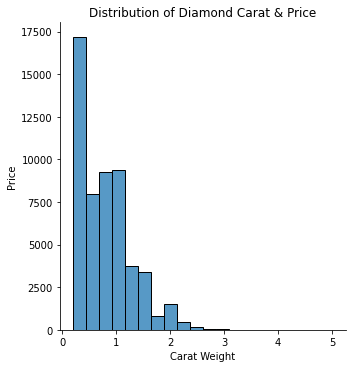

In [ ]:
# creating distribution of carat & price
sns.displot(diamonds_data['carat'], bins=20)
plt.xlabel("Carat Weight")
plt.ylabel("Price")
plt.title("Distribution of Diamond Carat & Price")
plt.show()

Splitting the Input Variables and Targeted Variable

In [ ]:
# splitting the input variables and the desired outcome 'price'
X = diamonds_data.drop(['price'], axis=1)
y = diamonds_data['price']

In [ ]:
# previewing the input variables
print(X)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53903 rows x 9 columns]


In [ ]:
# previewing the output variable
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53903, dtype: int64


In [ ]:
# checking the size of X & y
print(len(X), len(y))

53903 53903


Splitting Training data & Testing data

In [ ]:
# splliting the dataset into training and testing
# 80% for training, 20% for testing in a random state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# rechecking the size of splitted data
print(len(X_train), len(X_test))
print(len(X_train) + len(X_test))

print(len(y_train), len(y_test))
print(len(y_train) + len(y_test))

43122 10781
53903
43122 10781
53903


Training the Prediction Model using Random Forest Regressor

In [ ]:
# setting the number of trees for prediction model
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

Performance Evaluation after Training

In [ ]:
# prediction on training data
y_train_predicted = regressor.predict(X_train)

In [ ]:
# r2_error of training model
r2_score_train = metrics.r2_score(y_train, y_train_predicted)
print (r2_score_train)

0.9973717781796078


In [ ]:
# MAE of training model
MAE_train = mean_absolute_error(y_train, y_train_predicted)
print (MAE_train)

100.40854999768099


In [ ]:
# MAPE of training model
def mean_absolute_percentage_error (y_train, y_train_predicted):
  y_train, y_train_predicted = np.array(y_train), np.array(y_train_predicted)
  return np.mean(np.abs((y_train - y_train_predicted) / y_train)) *100

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print(MAPE_train)

2.3951063395319787


In [ ]:
# MSE of training model
MSE_train =  mean_squared_error(y_train, y_train_predicted)
print (MSE_train)

41958.49552135244


In [ ]:
# RMSE of training model
RMSE_train = math.sqrt(MSE_train)
print (RMSE_train)

204.83772973100545


In [ ]:
print("Performance of Training Model")
print("r2 score :", r2_score_train)
print("MAE :", MAE_train)
print("MAPE :", MAPE_train)
print("MSE :", MSE_train)
print("RMSE :", RMSE_train)

Performance of Training Model
r2 score : 0.9973717781796078
MAE : 100.40854999768099
MAPE : 2.3951063395319787
MSE : 41958.49552135244
RMSE : 204.83772973100545


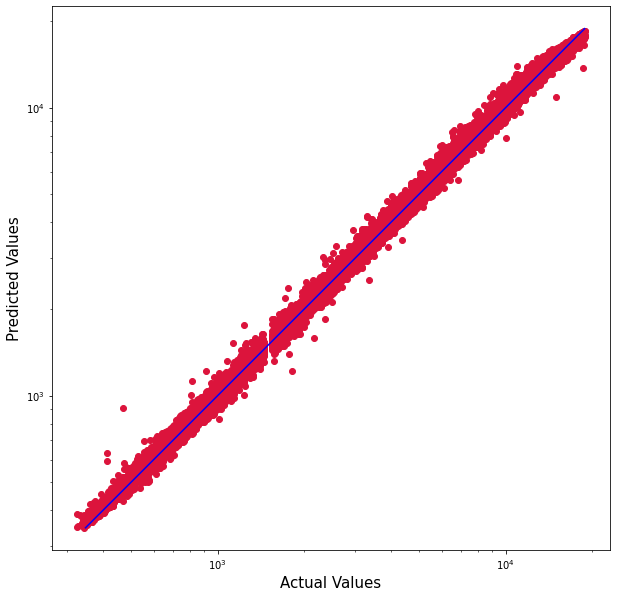

In [ ]:
# visualizing the performance
plt.figure (figsize=(10,10))
plt.scatter (y_train, y_train_predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_train_predicted), max(y_train))
p2 = min(min(y_train_predicted), max(y_train))
plt.plot ([p1, p2], [p1,p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

Performance Evaluation after Testing

In [ ]:
# predicting on testing data
y_test_predicted = regressor.predict(X_test)

In [ ]:
# previewing the predicted values
print(y_test_predicted)

[ 758.8  1285.5  4518.59 ... 8733.82  470.12 2971.38]


In [ ]:
# r2_error of testing model
r2_score_test = metrics.r2_score(y_test, y_test_predicted)
print (r2_score_train)

0.9973717781796078


In [ ]:
# MAE of testing model
MAE_test = mean_absolute_error(y_test, y_test_predicted)
print (MAE_test)

265.91204790173185


In [ ]:
# MAPE of testing model
def mean_absolute_percentage_error (y_test, y_test_predicted):
  y_test, y_test_predicted = np.array(y_test), np.array(y_test_predicted)
  return np.mean(np.abs((y_test - y_test_predicted) / y_test)) *100

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print(MAPE_test)

6.475699287542097


In [ ]:
# MSE of testing model
MSE_test =  mean_squared_error(y_test, y_test_predicted)
print (MSE_test)

294281.6071601043


In [ ]:
# RMSE of testing model
RMSE_test = math.sqrt(MSE_test)
print (RMSE_test)

542.4772872297091


In [ ]:
print("Performance of Testing Model")
print("r2 score :", r2_score_test)
print("MAE :", MAE_test)
print("MAPE :", MAPE_test)
print("MSE :", MSE_test)
print("RMSE :", RMSE_test)

Performance of Testing Model
r2 score : 0.9811726088162399
MAE : 265.91204790173185
MAPE : 6.475699287542097
MSE : 294281.6071601043
RMSE : 542.4772872297091


In [ ]:
print("Performance of Training vs Testing")
print("r2 score :", r2_score_train, " / ", r2_score_test)
print("MAE :", MAE_train, " / ", MAE_test)
print("MAPE :", MAPE_train, " / ", MAPE_test)
print("MSE :", MSE_train, " / ", MSE_test)
print("RMSE :", RMSE_train, " / ", RMSE_test)

Performance of Training vs Testing
r2 score : 0.9973717781796078  /  0.9811726088162399
MAE : 100.40854999768099  /  265.91204790173185
MAPE : 2.3951063395319787  /  6.475699287542097
MSE : 41958.49552135244  /  294281.6071601043
RMSE : 204.83772973100545  /  542.4772872297091


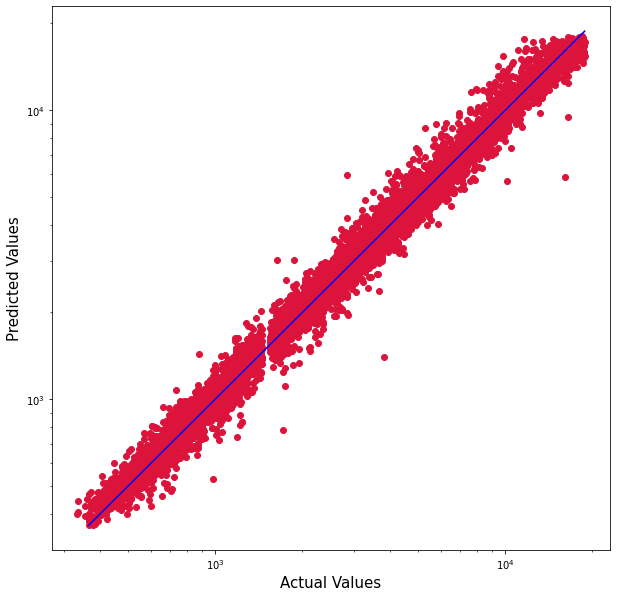

In [ ]:
# visualizing the performance
plt.figure (figsize=(10,10))
plt.scatter (y_test, y_test_predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_predicted), max(y_test))
p2 = min(min(y_test_predicted), max(y_test))
plt.plot ([p1, p2], [p1,p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

Prediction Model

In [ ]:
def prediction():
  print ("Enter the value of carat")
  carat = float(input())

  print("Fair: 0, Good: 1, Ideal: 2, Premium: 3, Very Good: 4")
  print ("Enter the value of cut")
  cut = int(input())

  print("D: 0, E: 1, F: 2, G: 3, H: 4, I: 5, J: 6")
  print("Enter the value of color")
  color = int(input())

  print("I1: 0, IF: 1, SI1: 2, SI2: 3, VS1: 4, VS2: 5, VVS1: 6, VVS2: 7")
  print("Enter the value of clarity")
  clarity = int(input())

  print("Enter the value of depth")
  depth = float(input())

  print("Enter the value of table")
  table = float(input())

  print("Enter the value of x")
  x = float(input())

  print("Enter the value of y")
  y = float(input())

  print("Enter the value of z")
  z = float(input())

  input_data = (carat,cut,color,clarity,depth,table,x,y,z)

  input_data_as_np = np.asarray(input_data)

  input_data_reshaped = input_data_as_np.reshape(1,-1)

  predicted_price = regressor.predict(input_data_reshaped)
  print("Predicted Price of Diamond: ", predicted_price, 'USD')

predicted_diamond_price = prediction()

predicted_diamond_price

Enter the value of carat
0.77
Fair: 0, Good: 1, Ideal: 2, Premium: 3, Very Good: 4
Enter the value of cut
3
D: 0, E: 1, F: 2, G: 3, H: 4, I: 5, J: 6
Enter the value of color
2
I1: 0, IF: 1, SI1: 2, SI2: 3, VS1: 4, VS2: 5, VVS1: 6, VVS2: 7
Enter the value of clarity
3
Enter the value of depth
59.3
Enter the value of table
59.0
Enter the value of x
2287
Enter the value of y
5.97
Enter the value of z
5.93
Predicted Price of Diamond:  [2427.68] USD


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# printing random sample data for manual testing
diamonds_data.sample(n = 10, random_state=500)

,carat,cut,color,clarity,depth,table,price,x,y,z
50677,0.76,3,2,3,59.3,59.0,2287,5.97,5.93,3.53
42483,0.38,1,1,1,59.1,58.0,1318,4.74,4.77,2.81
36953,0.27,2,5,7,61.6,55.0,480,4.17,4.21,2.58
20215,1.17,2,2,4,62.2,56.0,8648,6.74,6.77,4.20
19903,1.21,2,2,5,61.2,57.0,8452,6.87,6.82,4.19
38178,0.41,2,0,2,61.0,57.0,1015,4.80,4.78,2.92
32278,0.30,4,1,7,61.3,59.0,789,4.30,4.32,2.64
51394,0.71,3,0,3,62.8,57.0,2368,5.69,5.64,3.56
12497,1.15,4,1,3,60.0,59.0,5257,6.78,6.82,4.08
48854,0.82,1,6,2,57.4,59.0,2033,6.19,6.25,3.57
